In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

import scipy.stats as stat
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [6]:
# Read the CSV file into a DataFrame and set the "Date" column as the index
df = pd.read_csv("companies_and_stock_info", parse_dates=["Date"])

In [7]:
# Define a dictionary mapping each company to its sector
sector_mapping = {
    'apple': 'Technology',
    'microsoft': 'Technology',
    'google': 'Technology',
    'jpmc': 'Finance',
    'boa': 'Finance',
    'wfc': 'Finance',
    'jnj': 'Healthcare',
    'pfizer': 'Healthcare',
    'merck': 'Healthcare',
    'exxon': 'Energy',
    'chevron': 'Energy',
    'facebook': 'Communication',
    'verizon': 'Communication',
    'atnt': 'Communication'
}

df['Sector'] = df['company_name'].map(sector_mapping)

df.head()

,company_name,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line,Sector
0,apple,2005-01-03,1.156786,1.162679,1.117857,1.130179,0.956809,691992000,0.000000,0.000000,Technology
1,apple,2005-01-04,1.139107,1.169107,1.124464,1.141786,0.966635,1096810400,0.000220,0.000122,Technology
2,apple,2005-01-05,1.151071,1.165179,1.143750,1.151786,0.975101,680433600,0.000543,0.000295,Technology
3,apple,2005-01-06,1.154821,1.159107,1.130893,1.152679,0.975858,705555200,0.000704,0.000434,Technology
4,apple,2005-01-07,1.160714,1.243393,1.156250,1.236607,1.046911,2227450400,0.003604,0.001377,Technology


<Axes: xlabel='Sector', ylabel='Close'>

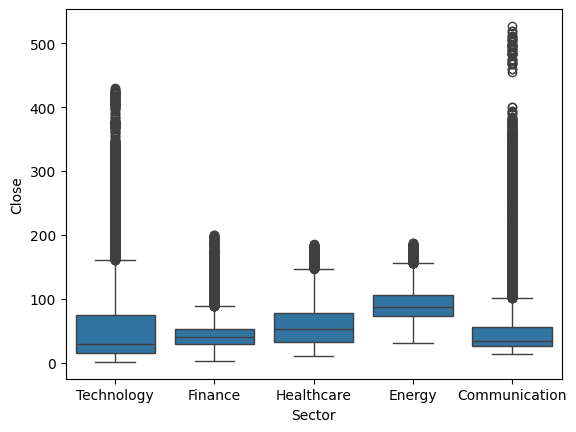

In [15]:
# @title Distribution of Close Price by Sector

sns.boxplot(data=df, x="Sector", y="Close")

<ipython-input-9-e32a7cf3de18>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Close', y='Sector', inner='box', palette='Dark2')


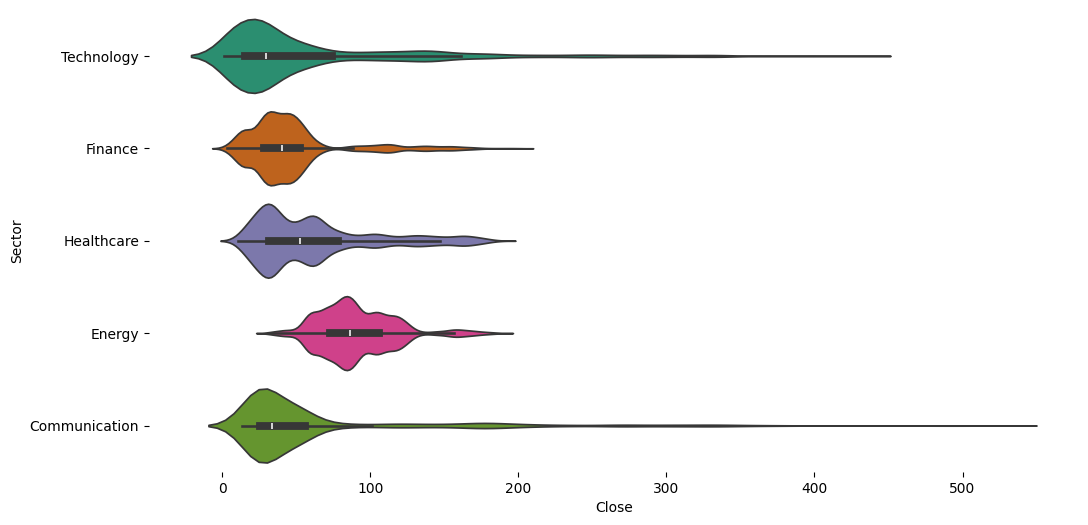

In [9]:
# @title Sector vs Close

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Sector'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Close', y='Sector', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Epoch 1/5
317/317 [==============================] - 44s 31ms/step - loss: 8.2755e-04
Epoch 2/5
317/317 [==============================] - 10s 31ms/step - loss: 4.1046e-04
Epoch 3/5
317/317 [==============================] - 11s 33ms/step - loss: 3.2728e-04
Epoch 4/5
317/317 [==============================] - 10s 33ms/step - loss: 2.6922e-04
Epoch 5/5
79/79 [==============================] - 2s 11ms/step


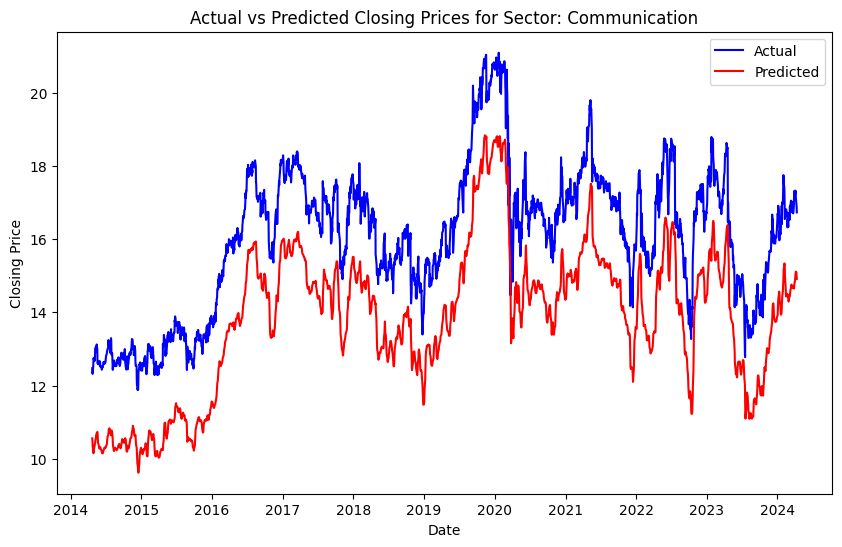

Epoch 1/5
242/242 [==============================] - 11s 27ms/step - loss: 8.6099e-04
Epoch 2/5
242/242 [==============================] - 8s 31ms/step - loss: 3.3626e-04
Epoch 3/5
242/242 [==============================] - 8s 31ms/step - loss: 2.5250e-04
Epoch 4/5
242/242 [==============================] - 7s 28ms/step - loss: 2.2243e-04
Epoch 5/5
60/60 [==============================] - 1s 10ms/step


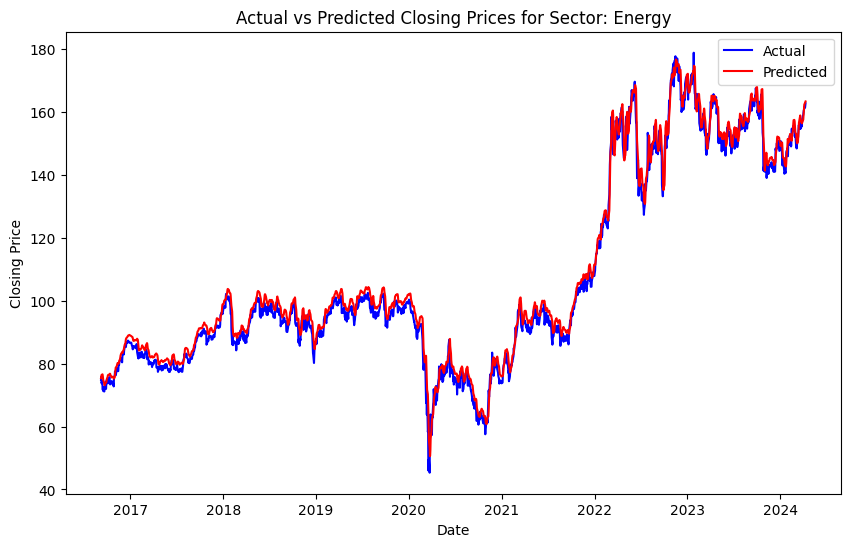

Epoch 1/5
363/363 [==============================] - 17s 32ms/step - loss: 0.0012
Epoch 2/5
363/363 [==============================] - 10s 29ms/step - loss: 3.3486e-04
Epoch 3/5
363/363 [==============================] - 11s 30ms/step - loss: 2.7564e-04
Epoch 4/5
363/363 [==============================] - 11s 30ms/step - loss: 2.2037e-04
Epoch 5/5
90/90 [==============================] - 2s 9ms/step


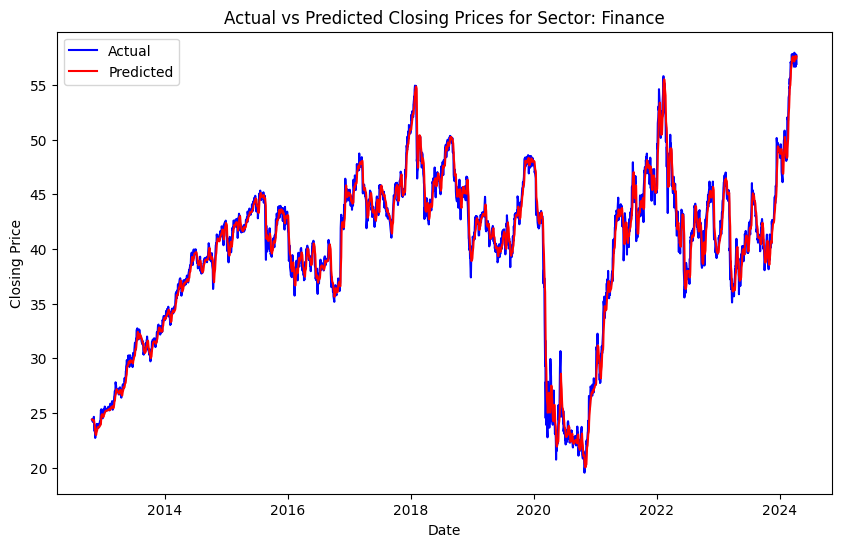

Epoch 1/5
363/363 [==============================] - 16s 31ms/step - loss: 0.0028
Epoch 2/5
363/363 [==============================] - 11s 29ms/step - loss: 4.2768e-04
Epoch 3/5
363/363 [==============================] - 11s 29ms/step - loss: 3.5245e-04
Epoch 4/5
363/363 [==============================] - 16s 44ms/step - loss: 2.7179e-04
Epoch 5/5
90/90 [==============================] - 2s 9ms/step


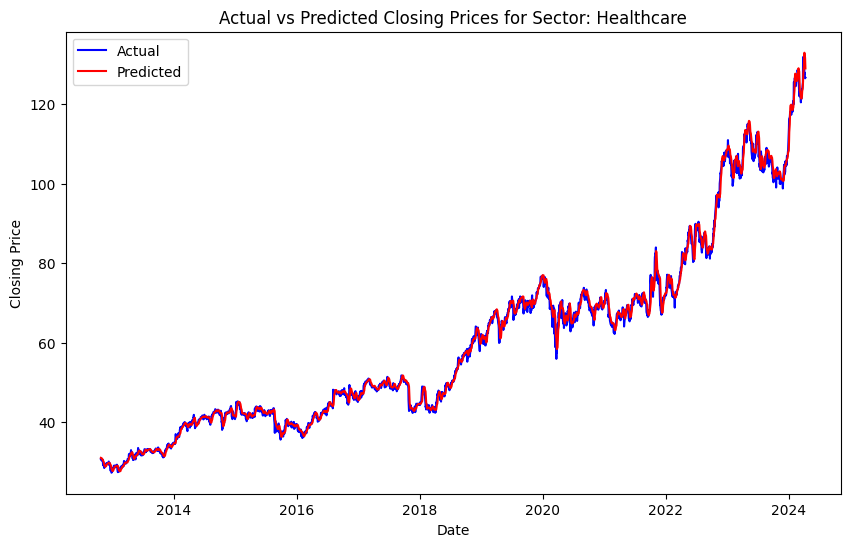

Epoch 1/5
363/363 [==============================] - 15s 28ms/step - loss: 0.0014
Epoch 2/5
363/363 [==============================] - 11s 30ms/step - loss: 4.3390e-04
Epoch 3/5
363/363 [==============================] - 11s 31ms/step - loss: 3.3122e-04
Epoch 4/5
363/363 [==============================] - 11s 31ms/step - loss: 2.9799e-04
Epoch 5/5
90/90 [==============================] - 2s 10ms/step


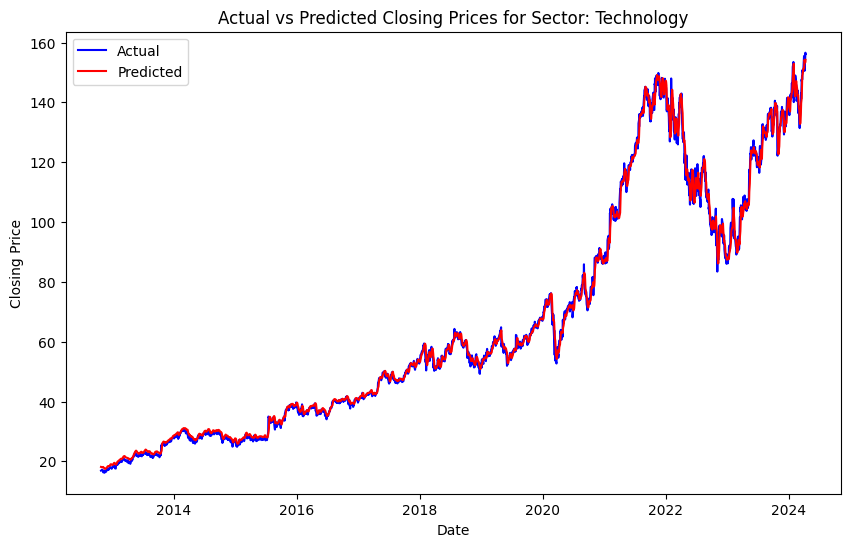

In [17]:
for sector, sector_data in df.groupby('Sector'):
    sector_data = sector_data[['Date', 'Adj Close']]

    sector_data.set_index('Date', inplace=True)

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(sector_data)

    train_size = int(len(scaled_data) * 0.8)
    test_size = len(scaled_data) - train_size
    train_data, test_data = scaled_data[0:train_size,:], scaled_data[train_size:len(scaled_data),:]

    def create_dataset(dataset, time_steps=1):
        X, Y = [], []
        for i in range(len(dataset) - time_steps):
            X.append(dataset[i:(i + time_steps), 0])
            Y.append(dataset[i + time_steps, 0])
        return np.array(X), np.array(Y)

    time_steps = 30
    X_train, Y_train = create_dataset(train_data, time_steps)
    X_test, Y_test = create_dataset(test_data, time_steps)

    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(LSTM(units=50))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, Y_train, epochs=5, batch_size=32)

    plt.show()

    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)  # Inverse scaling

    residuals = Y_test - predictions

    plt.figure(figsize=(10, 6))
    plt.plot(sector_data.index[train_size + time_steps:], scaler.inverse_transform(test_data)[time_steps:], label='Actual', color='blue')
    plt.plot(sector_data.index[train_size + time_steps:], predictions, label='Predicted', color='red')
    plt.title(f'Actual vs Predicted Closing Prices for Sector: {sector}')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.show()